In [1]:
#Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Impoting Data from .csv and saving in variable TD
TD = pd.read_csv('C:\\Users\\sheha\\OneDrive\\Desktop\\MSc-IT(COV)\\Semester 1\\Database Systems and Administration\\Assignment\\Diamond Price Prediction\\diamonds.csv')
TD.head()# to show 1st 5 rows of data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
TD.shape # to show the rows and colmns of the data

(53940, 11)

In [4]:
TD.isnull().sum() # to show the sum of all null fields

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
# EDA
TD.describe() # to show summary statistics of the data

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
TD = TD.dropna() # this removes all data whcih contains null values, since there are no null values the data remains the same
TD.drop(TD.columns[0], axis=1, inplace=True) # removing the 1st columnn since the its just numbering

In [7]:
TD.isnull().sum() # repeating previous step to recheck

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
TD.dtypes # to show the datatypes of the data

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
# EDA
TD.describe() # to show summary statistics of the data

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
print(TD[TD['x'] == 0]) # checking for x values where x = 0
print(TD[TD['y'] == 0]) # checking for y values where y = 0
print(TD[TD['z'] == 0]) # checking for z values where z = 0

       carat        cut color clarity  depth  table  price    x     y    z
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0
       carat        cut color clarity  depth  table  price    x    y    z
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.0  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.0  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.0  0.0
26243   1.20    Premium     D

In [11]:
TD = TD[TD['x'] != 0] # removing data where x = 0
TD = TD[TD['y'] != 0] # removing data where x = 0
TD = TD[TD['z'] != 0] # removing data where x = 0
print(TD[TD['x'] == 0]) # rechecking for x values where x = 0
print(TD[TD['y'] == 0]) # rechecking for y values where y = 0
print(TD[TD['z'] == 0]) # rechecking for z values where z = 0

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [12]:
TD.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
TD.describe(include='object') # to show summary of objects/categories which without specifying gives summary without objects

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


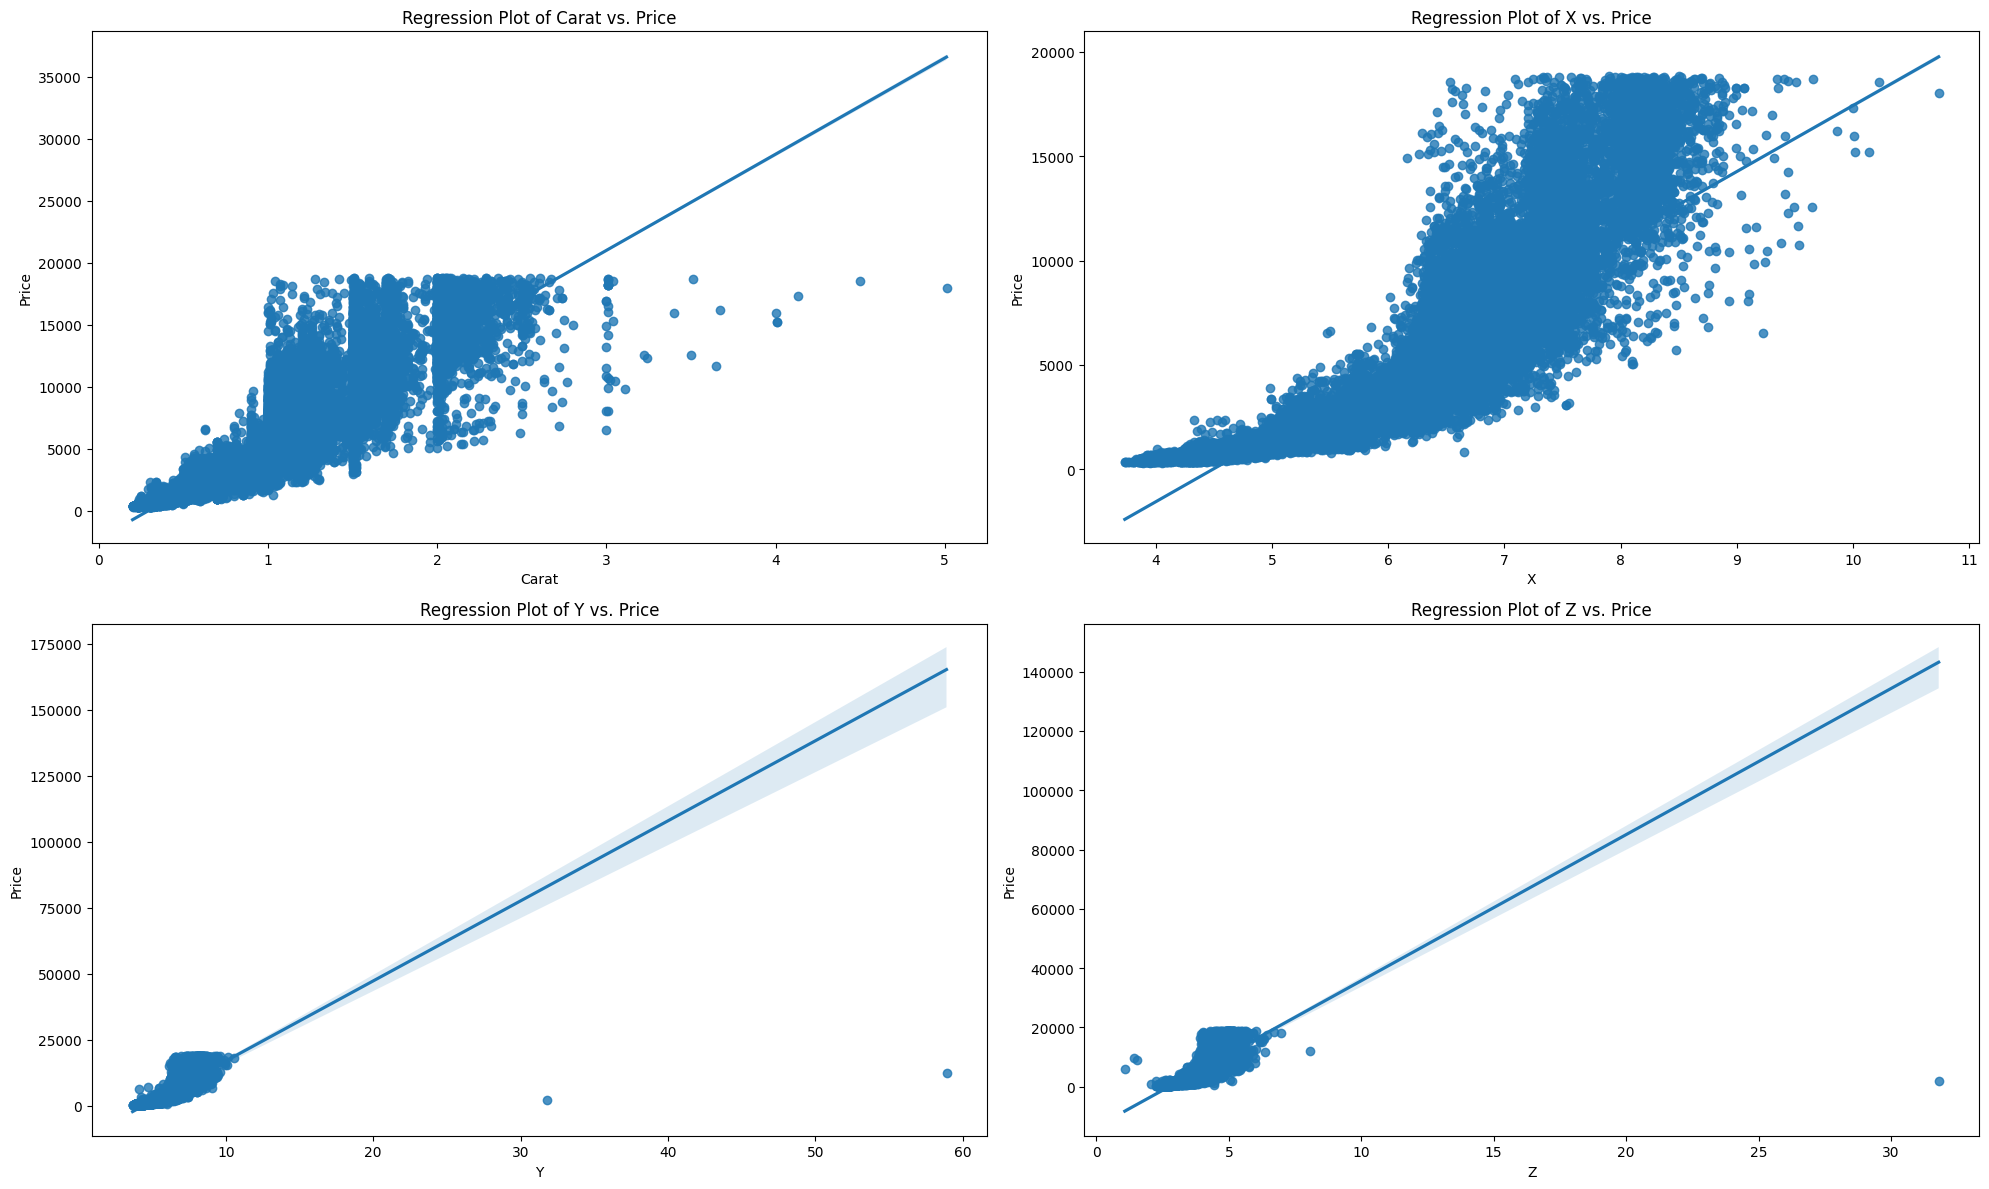

In [14]:
#Regression plot against all the categories
features = ['carat', 'x', 'y', 'z']
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=feature, y='price', data=TD)
    plt.title(f'Regression Plot of {feature.capitalize()} vs. Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [15]:
# Pearson Correlation Coefficient to show linear relationship
for feature in features:
    pcf, pvv = stats.pearsonr(TD[feature], TD['price'])
    print("The Pearson Correlation Coefficient is", pcf, " with a P-value of P =", pvv," for ",feature)

The Pearson Correlation Coefficient is 0.9215920634723663  with a P-value of P = 0.0  for  carat
The Pearson Correlation Coefficient is 0.8872313725276473  with a P-value of P = 0.0  for  x
The Pearson Correlation Coefficient is 0.867864244674353  with a P-value of P = 0.0  for  y
The Pearson Correlation Coefficient is 0.8682064012988957  with a P-value of P = 0.0  for  z


<Axes: xlabel='cut', ylabel='price'>

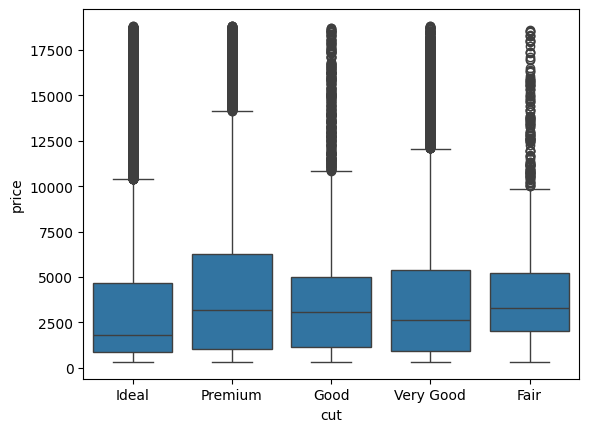

In [16]:
# box plot for the quality of cut
sns.boxplot(x='cut',y='price',data = TD)

<Axes: xlabel='color', ylabel='price'>

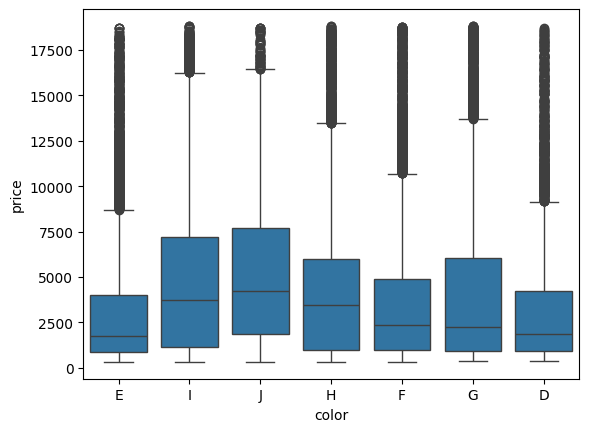

In [17]:
# box plot for color of the diamond
sns.boxplot(x='color',y='price',data = TD)

<Axes: xlabel='clarity', ylabel='price'>

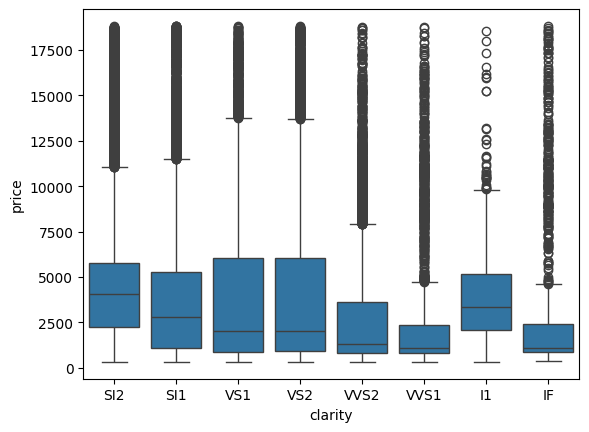

In [18]:
# box plot for the clarity of the diamond
sns.boxplot(x='clarity',y='price',data = TD)

In [19]:
#nothing to remove since all data is required and affects the price of the diamond
TD.shape

(53920, 10)

In [20]:
# Data Transformation
labelencoder = LabelEncoder()
TD.cut = labelencoder.fit_transform(TD.cut)
TD.color = labelencoder.fit_transform(TD.color)
TD.clarity = labelencoder.fit_transform(TD.clarity)

In [21]:
TD.head(10) # to check if label encoding is applied

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,4,59.4,61.0,338,4.00,4.05,2.39


In [22]:
# normalization
traindata = stats.zscore(TD)
traindata

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198204,-0.538173,-0.936971,-0.484445,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084
1,-1.240417,0.434877,-0.936971,-1.064312,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896
2,-1.198204,-1.511224,-0.936971,0.095422,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896
3,-1.071566,0.434877,1.414232,0.675289,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396
4,-1.029353,-1.511224,2.002033,-0.484445,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583
...,...,...,...,...,...,...,...,...,...,...
53935,-0.163993,-0.538173,-1.524772,-1.064312,-0.662921,-0.204488,-0.294437,0.016413,0.022027,-0.057004
53936,-0.163993,-1.511224,-1.524772,-1.064312,0.942868,-1.099725,-0.294437,-0.037186,0.013256,0.099575
53937,-0.206205,1.407928,-1.524772,-1.064312,0.733417,1.138369,-0.294437,-0.063986,-0.048142,0.028403
53938,0.131496,0.434877,0.826431,-0.484445,-0.523288,0.243131,-0.294437,0.373744,0.337784,0.284622


In [23]:
# dividing the data wherein xt retains all the features while yt retains the target (price)
xt = traindata.drop('price',axis =1)
yt = traindata['price']

In [24]:
xt.head() # checking if data is split properly

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198204,-0.538173,-0.936971,-0.484445,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084
1,-1.240417,0.434877,-0.936971,-1.064312,-1.361090,1.585988,-1.645173,-1.662014,-1.750896
2,-1.198204,-1.511224,-0.936971,0.095422,-3.385781,3.376463,-1.502241,-1.460280,-1.750896
3,-1.071566,0.434877,1.414232,0.675289,0.454149,0.243131,-1.368242,-1.319943,-1.295396
4,-1.029353,-1.511224,2.002033,-0.484445,1.082501,0.243131,-1.243176,-1.214690,-1.124583


In [25]:
yt.head() # checking if data is split properly

0   -0.904132
1   -0.904132
2   -0.903881
3   -0.902125
4   -0.901875
Name: price, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split #importing important library for training a model, to split the data properly according to the % selected
Xt,Xtt,Yt,Ytt = train_test_split(xt,yt,test_size=0.3,random_state=42)

In [27]:
# Multiple Linear Regression fitting training data into model
model = LinearRegression()
model_mlr = model.fit(Xt,Yt)

In [28]:
# making prediction after fitting data into mdoel
YpMLR = model_mlr.predict(Xtt)

In [29]:
# calculating the mean square error of the model with actual data
mse_MLR = mean_squared_error(Ytt,YpMLR)
print('The mean squared error for Multiple Linear Regression: ',mse_MLR)

The mean squared error for Multiple Linear Regression:  0.11096621872138687


In [30]:
# calculating the mean absolute error of the model with actual data
mae_MLR = mean_absolute_error(Ytt,YpMLR)
print('The mean absolute error for Multiple Linear Regression: ',mae_MLR)

The mean absolute error for Multiple Linear Regression:  0.21303238468283645


In [31]:
# fitting data into Random forest
rfModel = RandomForestRegressor()
model_rf = rfModel.fit(Xt,Yt)

In [32]:
# making prediction after fitting data
Yprf = model_rf.predict(Xtt)

In [33]:
# calculating the mean square error of the model with actual data
mse_RF = mean_squared_error(Ytt,Yprf)
print('The mean squared error for Random Forest: ',mse_RF)

The mean squared error for Random Forest:  0.017943387274699768


In [34]:
# calculating the mean absolute error of the model with actual data
mae_RF = mean_absolute_error(Ytt,Yprf)
print('The mean absolute error for Random Forest: ',mae_RF)

The mean absolute error for Random Forest:  0.06707331695538826


In [35]:
# fitting data into LASSO model
LassoModel = Lasso()
model_ls = LassoModel.fit(Xt,Yt)

In [36]:
# making prediction using testing data
YpLs = model_ls.predict(Xtt)

In [37]:
# calculating the mean square error of the model with actual data
mse_Ls = mean_squared_error(Ytt,YpLs)
print('The mean squared error for Lasso: ',mse_Ls)

The mean squared error for Lasso:  0.9810294848199543


In [38]:
# calculating the mean absolute error of the model with actual data
mae_Ls = mean_absolute_error(Ytt,YpLs)
print('The mean absolute error for Lasso: ',mae_Ls)

The mean absolute error for Lasso:  0.7532785276594522


In [39]:
# saving all the scores of mean squared error
scoresSE = [('MLR',mse_MLR),('Random Forest',mse_RF),('LASSO',mse_Ls)]
# saving all the scores of mean absolute error
scoresAE = [('MLR',mae_MLR),('Random Forest',mae_RF),('LASSO',mae_Ls)]

In [40]:
# Visualizing MSE and MAE in table format
mse = pd.DataFrame(data = scoresSE,columns=['Model','MSE Score'])
mae = pd.DataFrame(data = scoresAE,columns=['Model','MAE Score'])
cdf = pd.merge(mse,mae,on='Model')
cdf

,Model,MSE Score,MAE Score
0,MLR,0.110966,0.213032
1,Random Forest,0.017943,0.067073
2,LASSO,0.981029,0.753279


<function matplotlib.pyplot.show(close=None, block=None)>

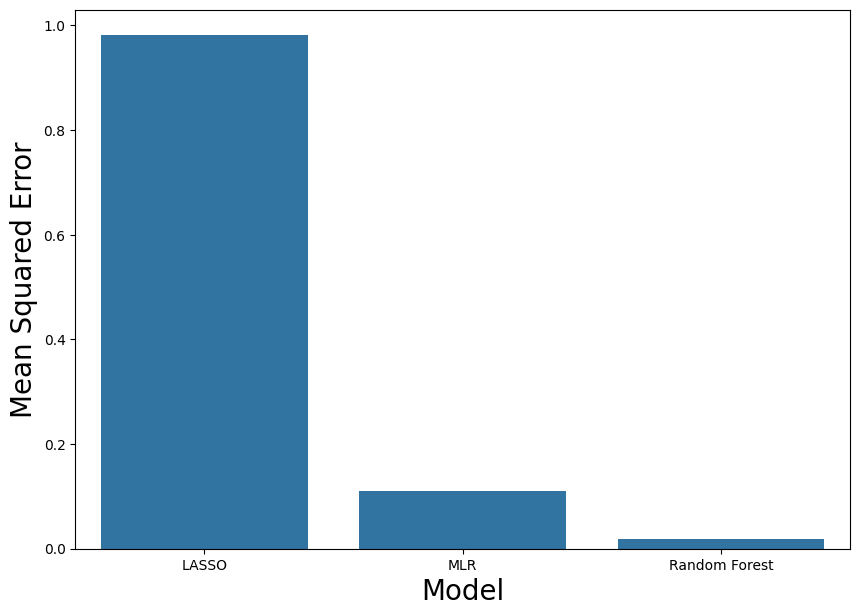

In [41]:
# Visualizing findings in diagram
mse.sort_values(by=(['MSE Score']), ascending=False, inplace=True)
f,axe = plt.subplots(1,1,figsize=(10,7))
sns.barplot(x=mse['Model'],y=mse['MSE Score'],ax = axe)
axe.set_xlabel('Model',size=20)
axe.set_ylabel('Mean Squared Error',size=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

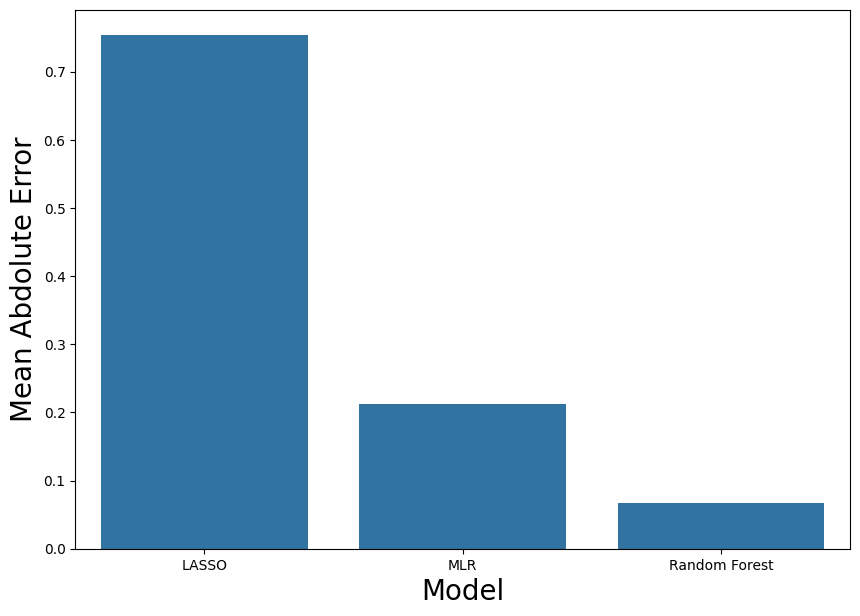

In [42]:
# Visualizing findings in diagram
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)
f,axe = plt.subplots(1,1,figsize=(10,7))
sns.barplot(x=mae['Model'],y=mae['MAE Score'],ax = axe)
axe.set_xlabel('Model',size=20)
axe.set_ylabel('Mean Abdolute Error',size=20)
plt.show